<a href="https://colab.research.google.com/github/dansarmiento/MachineLearning/blob/main/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Multiple linear regression**

Multiple linear regression helps estimate the linear relationship between one continuous dependent variable and multiple independent variables.  

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
# The data is in google sheets and the spreadsheet can be imported to a dataframe by passing the sheet identifiers in to a url like this

#  https://docs.google.com/spreadsheets/d/1vsDrTCRGDYNs6SlE0wc5pKkmT7lbBLf95ktD1obYGuo/edit?usp=sharing
sheet_id = "1vsDrTCRGDYNs6SlE0wc5pKkmT7lbBLf95ktD1obYGuo"
sheet_name = "Sheet1"

gsheet_url = "https://docs.google.com/spreadsheets/d/{}/gviz/tq?tqx=out:csv&sheet={}".format(sheet_id,sheet_name)
df = pd.read_csv(gsheet_url)
df.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.05422
1,Medium,14.949790,0.274451,Macro,222.74170
2,Low,10.377260,0.061984,Mega,102.77480
3,High,26.469270,7.070945,Micro,328.23940
4,High,36.876300,7.618605,Mega,351.80730


**Data Exploration**

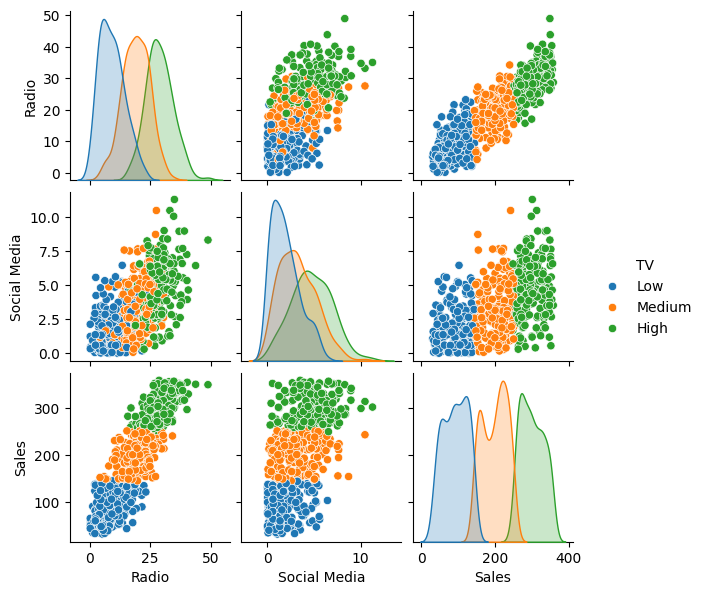

In [ ]:
sns.pairplot(df, height=2, hue='TV')

radio and social media appear to have a linear relationship with sales.  considering the nature of the data, we want to evaluate these two columns as independent variables in a multiple linear regression model with sales

In [ ]:
# We can look at the mean sales for each category in TV and Influencer to look at the relationship between these categorical variables and sales
# From this we can tell that Influencer is a weak variable but that TV seems to be good
print(df.groupby(by='TV').Sales.mean())
print('')
print(df.groupby(by='Influencer').Sales.mean())

TV
High      300.529587
Low        91.646842
Medium    199.023465
Name: Sales, dtype: float64

Influencer
Macro    205.660045
Mega     180.385094
Micro    198.655083
Nano     190.777767
Name: Sales, dtype: float64


In [ ]:
# cleaning the data starts with looking for nulls and then removing rows with nulls
df.isnull().sum()

,0
TV,1
Radio,1
Social Media,0
Influencer,0
Sales,1


In [ ]:
# not much is null, clean for the performance of the regression model
df.dropna(inplace=True)

In [ ]:
# rename the columns to work with the model
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,tv,radio,social_media,influencer,sales
0,Low,1.218354,1.270444,Micro,90.05422
1,Medium,14.949790,0.274451,Macro,222.74170
2,Low,10.377260,0.061984,Mega,102.77480
3,High,26.469270,7.070945,Micro,328.23940
4,High,36.876300,7.618605,Mega,351.80730


In [ ]:
# starting from OLS

ols_formula = 'sales ~ C(tv) + radio'

ols_model = ols(formula = ols_formula, data=df)
ols_results = ols_model.fit()
print(ols_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1782.
Date:                Wed, 07 May 2025   Prob (F-statistic):          1.61e-287
Time:                        20:13:46   Log-Likelihood:                -2701.4
No. Observations:                 569   AIC:                             5411.
Df Residuals:                     565   BIC:                             5428.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         217.6367      6.577     

📌 Model Info
Dep. Variable: sales
→ The outcome you're predicting — product sales.

Model: OLS
→ Ordinary Least Squares regression method.

Method: Least Squares
→ Confirms OLS is used to minimize the squared errors.

Date / Time:
→ When the model was run (not analytically important).

📈 Model Fit Quality
R-squared: 0.904
→ 90.4% of the variability in sales is explained by the model — very high explanatory power.

Adj. R-squared: 0.904
→ Adjusts for number of predictors; also very high, confirming strong fit without overfitting.

F-statistic: 1782
→ Measures if your model explains a significant amount of variance. A very large number → excellent.

Prob (F-statistic): 1.61e-287
→ This probability is practically 0 → the model’s predictive power is highly statistically significant.

Log-Likelihood: -2701.4
→ Used in comparing models (higher is better). Not directly interpretable alone.

AIC / BIC: 5411 / 5428
→ Model selection criteria that penalize for complexity. Use to compare across models; lower = better.

📊 Dataset Shape
No. Observations: 569
→ Number of rows (data points) in your dataset.

Df Residuals: 565
→ Degrees of freedom remaining after estimating coefficients.

Df Model: 3
→ There are 3 predictor variables (tv with 3 categories minus 1 for reference group, and radio).

⚙️ Coefficients Table
| Variable | Coef | P>|t| | 95% CI |
|-----------------------|-----------|--------|---------------------------|
| Intercept | 217.6367 | 0.000 | [204.718, 230.556] |
| C(tv)[T.Low] | -152.0897 | 0.000 | [-162.225, -141.954] |
| C(tv)[T.Medium] | -73.4835 | 0.000 | [-80.530, -66.437] |
| radio | 2.8864 | 0.000 | [2.460, 3.312] |

Intercept:
→ When TV = "High" (the reference group) and radio = 0, expected sales = 217.64.

C(tv)[T.Low]:
→ TV advertising in the "Low" group is associated with ~152 fewer sales than "High" (very significant).

C(tv)[T.Medium]:
→ Medium TV ad spend results in ~73 fewer sales compared to High. Still significant.

radio:
→ For every 1 unit increase in radio spend, sales increase by ~2.89 units, highly significant.

All p-values are < 0.001, meaning all predictors have statistically significant effects.

🧪 Diagnostics
Omnibus: 35.219 / Prob(Omnibus): 0.000
→ Indicates some deviation from normality in residuals (might not be severe, but notable).

Skew: 0.087
→ Nearly symmetric residuals (close to 0 = good).

Kurtosis: 2.255
→ Slightly flatter tails than a normal distribution (ideal = 3).

Durbin-Watson: 1.949
→ Close to 2 → no serious autocorrelation detected.

Jarque-Bera (JB): 13.863 / Prob(JB): 0.000976
→ Suggests residuals might deviate from perfect normality — worth checking residual plots.

Cond. No.: 155
→ Indicates no strong multicollinearity among predictors (rule of thumb: > 30 could be a problem).

📝 Summary
Your model is:

Very strong (R² = 0.904)

Highly significant (p-values < 0.001)

Well-behaved (residuals are reasonably normal, no autocorrelation)

**Check for model assumptions including linearity, normality, and homoscedasticity**

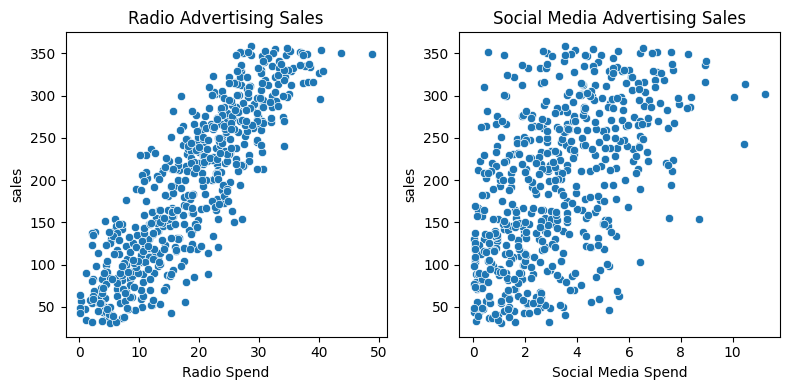

In [ ]:
# linearity

fig, axes = plt.subplots(1,2,figsize=(8,4))

# first a scatterplot for radio x sales
sns.scatterplot(x='radio', y='sales', data=df, ax=axes[0])
axes[0].set_title('Radio Advertising Sales')

# then a scatterplot for social media and sales
sns.scatterplot(x='social_media', y='sales', data=df, ax=axes[1])
axes[1].set_title('Social Media Advertising Sales')

axes[1].set_xlabel('Social Media Spend')
axes[0].set_xlabel('Radio Spend')

plt.tight_layout()

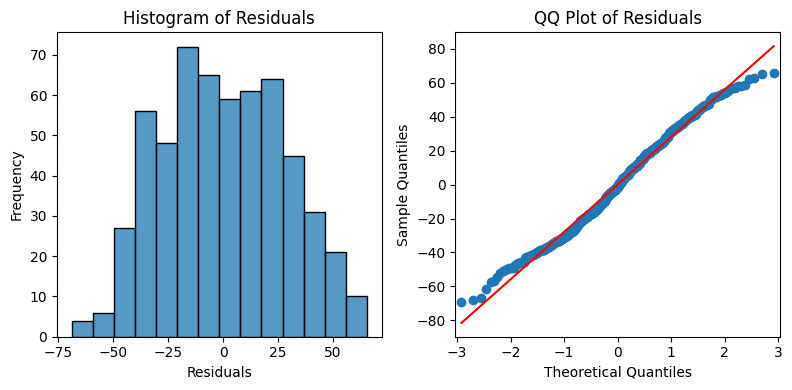

In [ ]:
# Normality will be evaluated with histogram of the residuals and qq plot of hte residuals

residuals = ols_results.resid

fig, axes = plt.subplots(1,2,figsize=(8,4))

# first a histogram of the residuals
sns.histplot(residuals, ax=axes[0])

axes[0].set_xlabel('Residuals')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of Residuals')

# then a qq plot of the residuals
sm.qqplot(residuals, line='s', ax=axes[1])
axes[1].set_title('QQ Plot of Residuals')

plt.tight_layout()

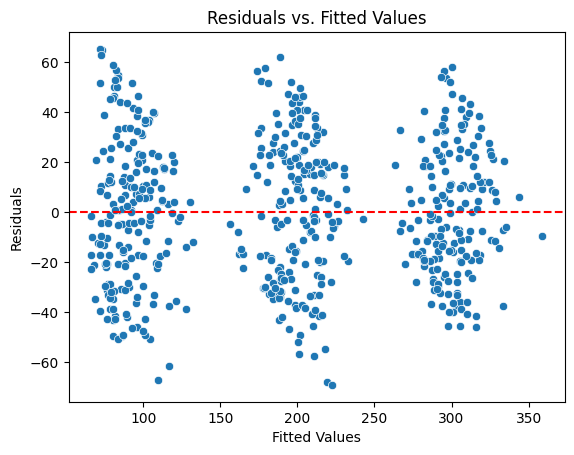

In [ ]:
# for homoscedasticity, we will create a scatterplot with the residuals and have a constant line at 0

fig = sns.scatterplot(x=ols_results.fittedvalues, y=residuals)
fig.set_xlabel('Fitted Values')
fig.set_ylabel('Residuals')
fig.set_title('Residuals vs. Fitted Values')
fig.axhline(y=0, color='r', linestyle='--')

plt.show()

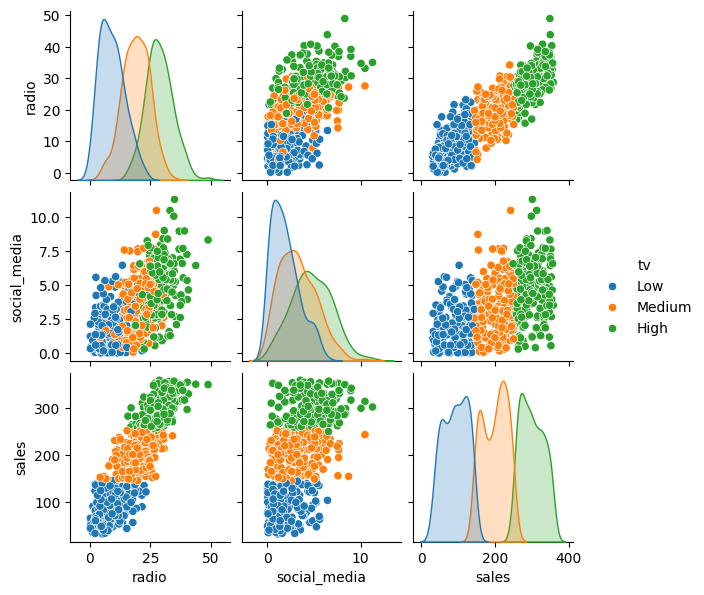

In [ ]:
# for multiple regression, there is an additional assumption that has to be checked which is multicollinearity i.e. that no two independent variables can be highly correlated with each other

sns.pairplot(df, height=2, hue='tv')

In [ ]:
# here we will calculate the variance inflation factor

from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[['radio','social_media']]

vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

df_vif = pd.DataFrame(vif, index=X.columns, columns=['VIF'])
df_vif

,VIF
radio,4.93238
social_media,4.93238
